In [3]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas.io.data import DataReader

from datetime import datetime

In [140]:
firms = ["GOOG","YHOO","FB","AAPL","MSFT","AMZN"]

In [198]:
end = datetime.now()

start = datetime(end.year-2,end.month,end.day)


In [199]:
for each_firm in firms:
    globals()[each_firm] = DataReader(each_firm,"yahoo",start,end)

In [200]:
MSFT.describe()

,Open,High,Low,Close,Volume,Adj Close
count,502.000000,502.000000,502.000000,502.000000,5.020000e+02,502.000000
mean,44.751693,45.164044,44.369024,44.790319,3.466378e+07,43.704937
std,4.613721,4.665369,4.582735,4.622693,1.693509e+07,5.044966
min,34.730000,35.880001,34.630001,34.980000,9.000500e+06,33.145346
25%,41.462499,41.847502,41.160000,41.570000,2.617690e+07,40.189385
50%,44.745001,45.110001,44.274999,44.610001,3.118095e+07,43.640845
75%,47.007498,47.540001,46.599998,47.102501,3.767052e+07,46.299171
max,56.470001,56.849998,56.290001,56.549999,2.025224e+08,56.549999


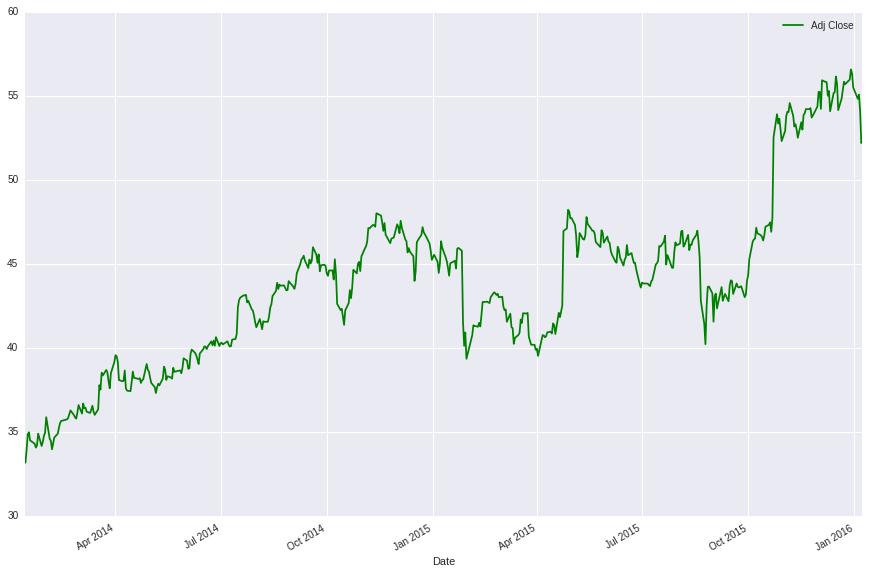

In [201]:
MSFT["Adj Close"].plot(legend = True, figsize = (15,10), color = "green") 

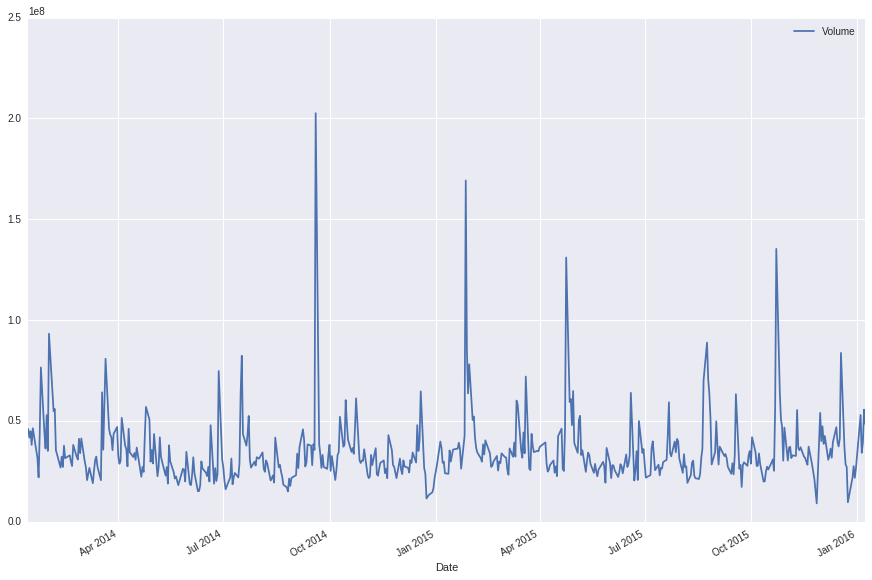

In [202]:
MSFT["Volume"].plot(legend = True, figsize = (15,10))

In [203]:
day_list = [30,90,180]

for day in day_list:
    col_name = "M.avg for %s days" %(str(day))
    MSFT[col_name] = pd.rolling_mean(TSLA["Adj Close"],day)  
   

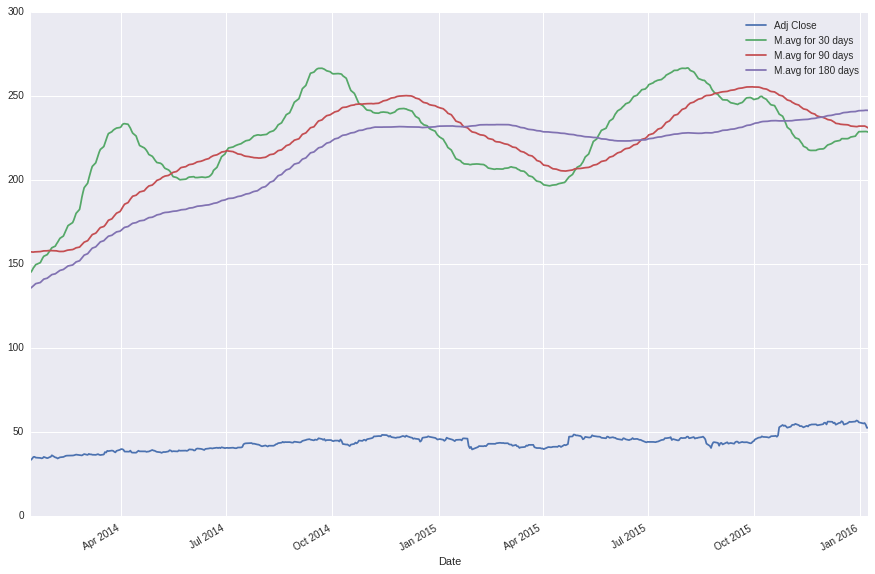

In [204]:
MSFT[["Adj Close", "M.avg for 30 days",
      "M.avg for 90 days",
      "M.avg for 180 days"]].plot(legend = True, figsize = (15,10))

In [206]:
MSFT["Daily Return"]=MSFT["Adj Close"].pct_change()

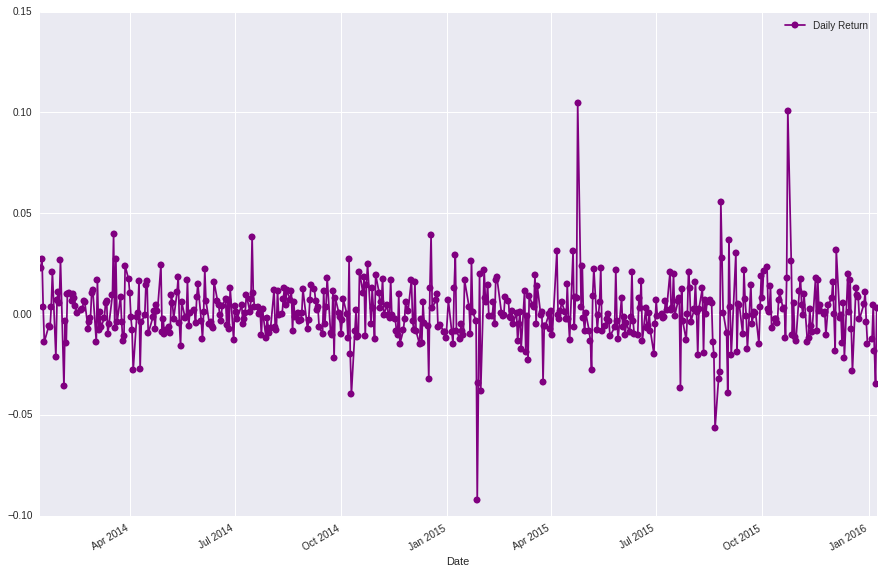

In [207]:
MSFT["Daily Return"].plot(legend = True, 
                          figsize = (15,10),
                         linestyle = "-",
                         marker="o", color = "purple")

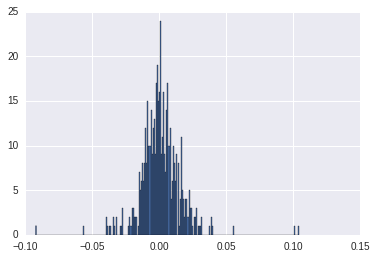

In [208]:
MSFT["Daily Return"].hist(bins = 250)

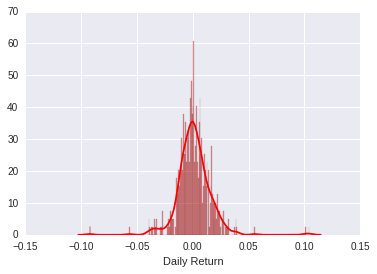

In [209]:
sns.distplot(MSFT["Daily Return"].dropna(), bins = 250, color ="red")

In [210]:
closing_stock_df = DataReader(firms,"yahoo", start,end)["Adj Close"]

In [211]:
daily_return = closing_stock_df.pct_change()

In [212]:
daily_return.head()

,AAPL,AMZN,FB,GOOG,MSFT,YHOO
Date,,,,,,
2014-01-13,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-14,0.019898,0.016778,0.032731,NaN,0.022870,0.028757
2014-01-15,0.020077,-0.004201,-0.002425,NaN,0.027390,-0.001701
2014-01-16,-0.005580,-0.000177,-0.007118,NaN,0.003536,-0.017775
2014-01-17,-0.024502,0.009626,-0.015562,NaN,-0.013825,-0.008181


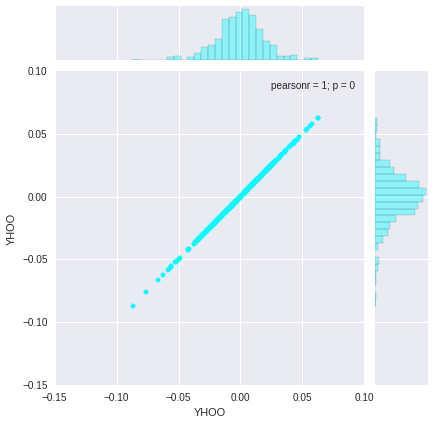

In [213]:
sns.jointplot("YHOO","YHOO",daily_return, color = "cyan")

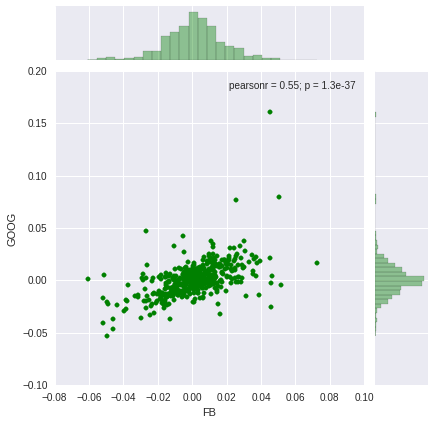

In [214]:
sns.jointplot("FB","GOOG",daily_return,color = "green")

/home/aamir/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


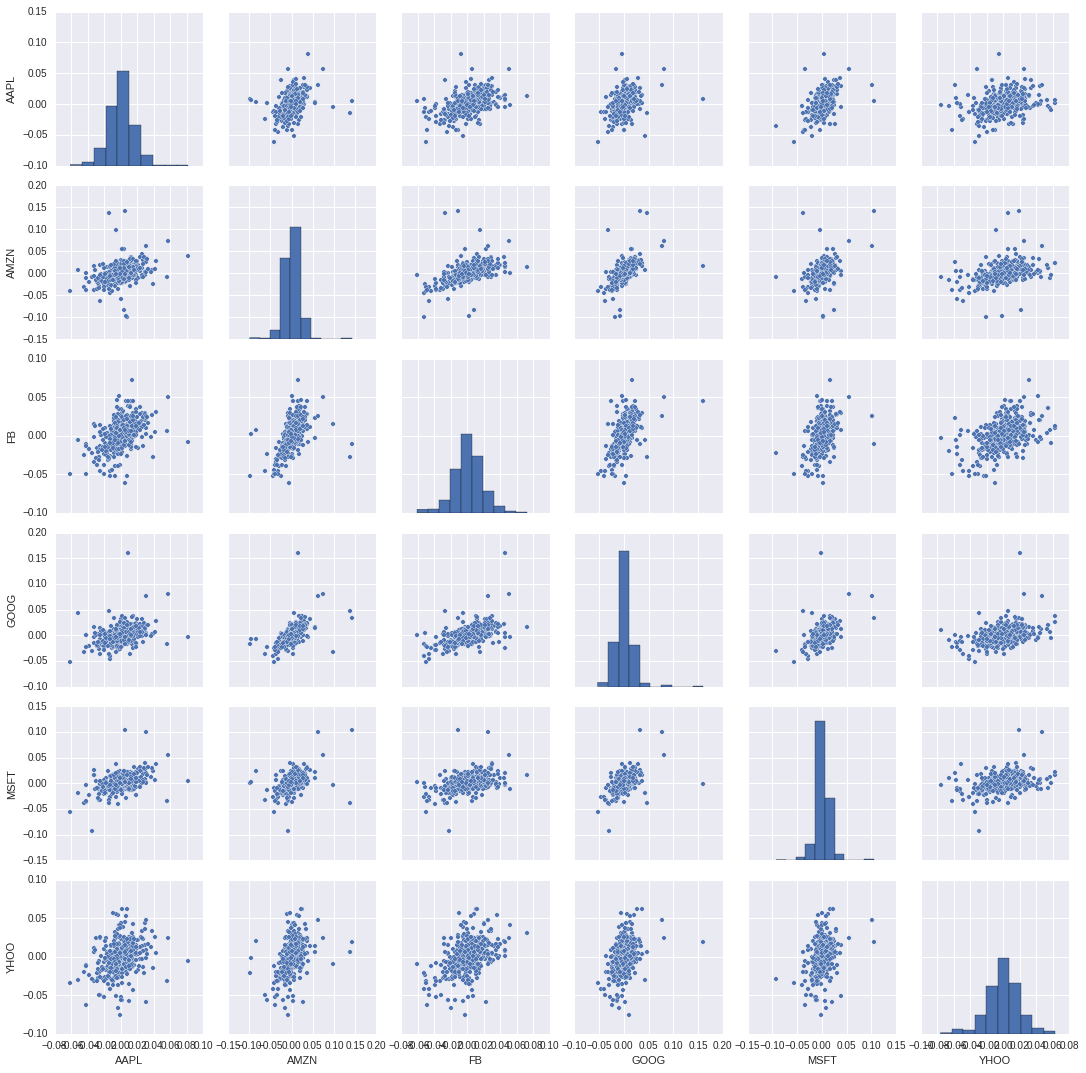

In [215]:
sns.pairplot(daily_return.dropna())

/home/aamir/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


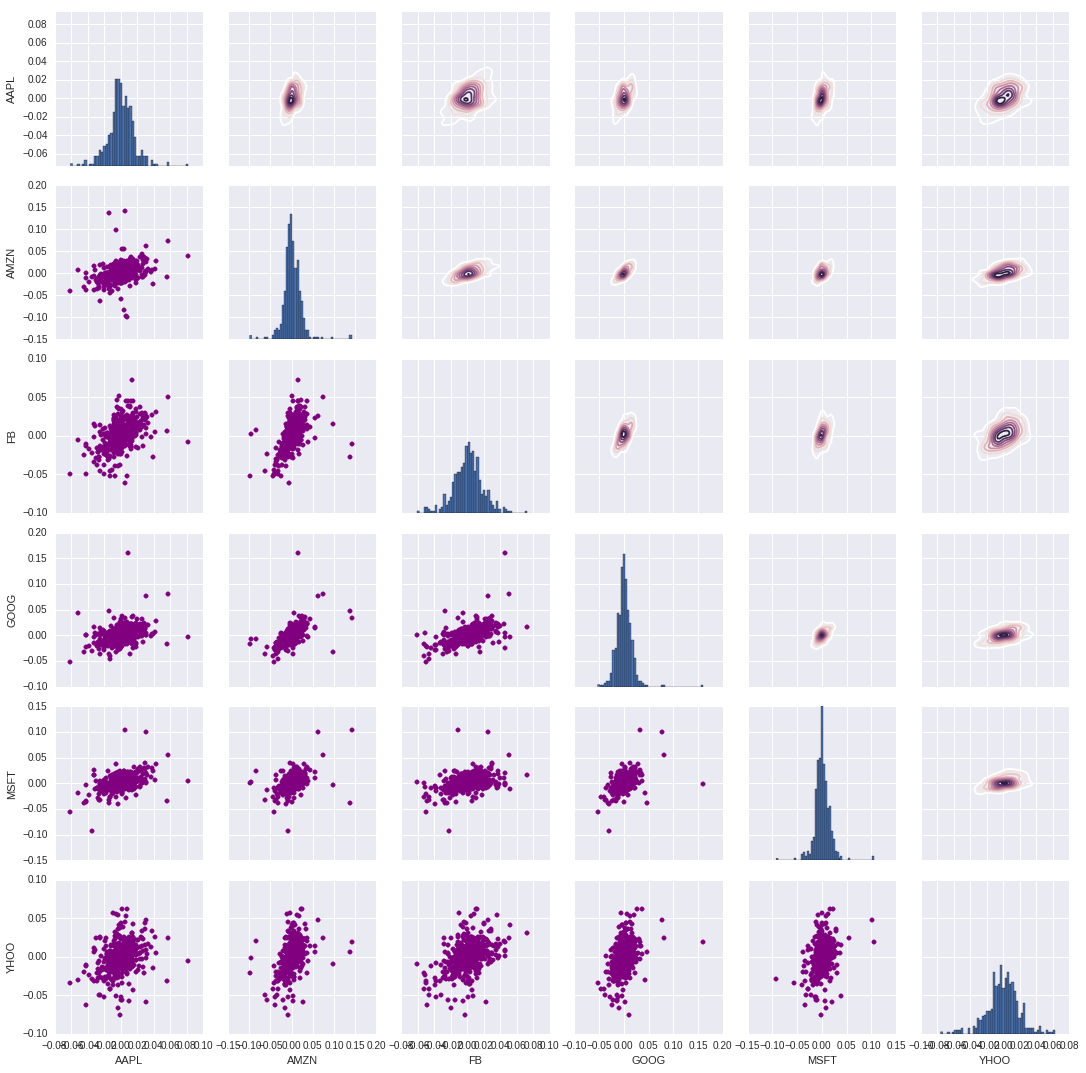

In [216]:
pairs_returns = sns.PairGrid(daily_return.dropna())

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

pairs_returns.map_upper(sns.kdeplot, cmap = cmap)

pairs_returns.map_lower(plt.scatter, color = "purple")

pairs_returns.map_diag(plt.hist, bins = 50)

/home/aamir/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


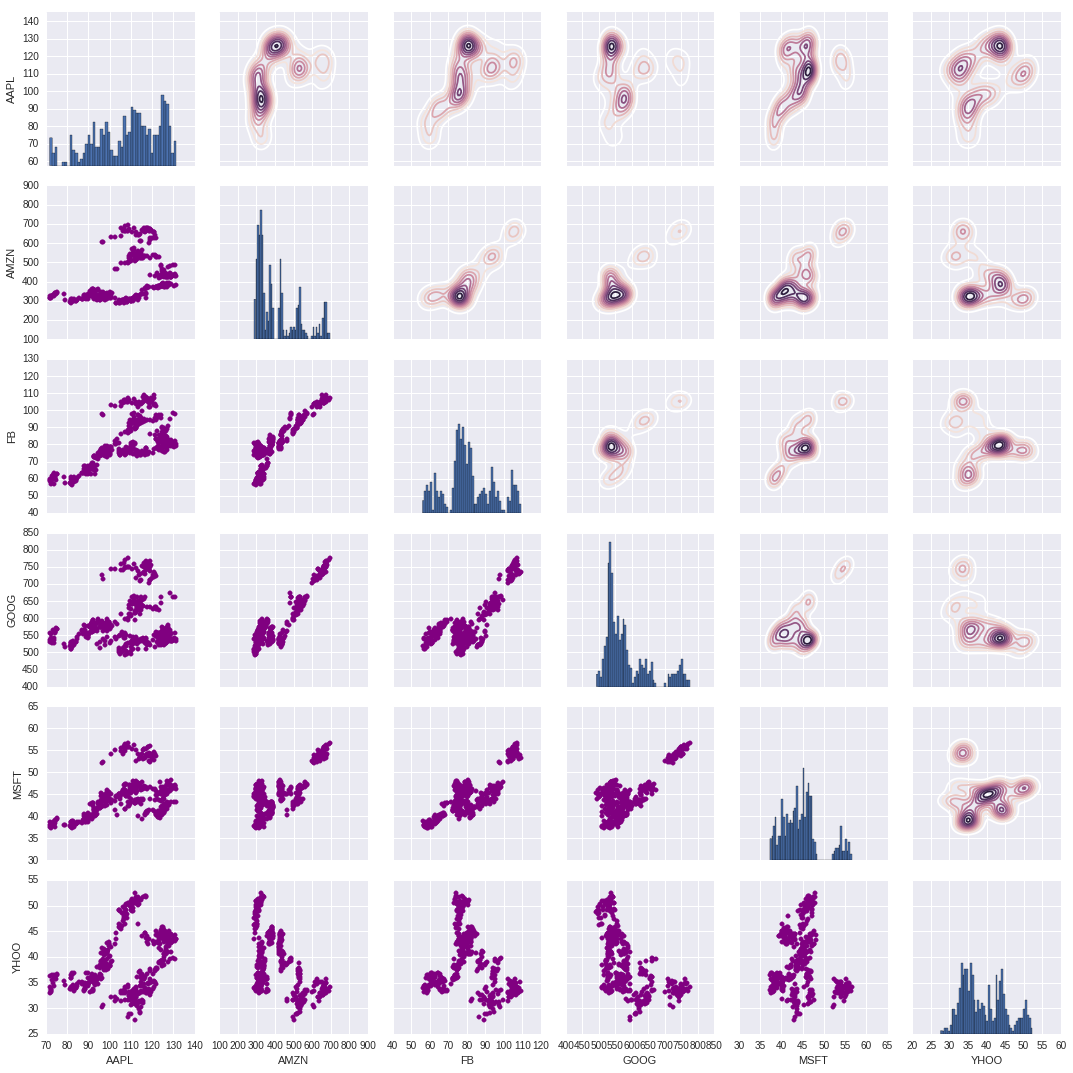

In [217]:

#pairs_returns = sns.PairGrid(daily_return[["GOOG","YHOO","FB","AMZN"]].dropna())

pairs_returns = sns.PairGrid(closing_stock_df.dropna())

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

pairs_returns.map_upper(sns.kdeplot, cmap = cmap)

pairs_returns.map_lower(plt.scatter, color = "purple")

pairs_returns.map_diag(plt.hist, bins = 50)

/home/aamir/anaconda3/lib/python3.5/site-packages/seaborn/linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/home/aamir/anaconda3/lib/python3.5/site-packages/seaborn/linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


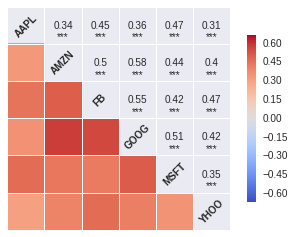

In [218]:
sns.corrplot(daily_return.dropna(), annot=True)

/home/aamir/anaconda3/lib/python3.5/site-packages/seaborn/linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/home/aamir/anaconda3/lib/python3.5/site-packages/seaborn/linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


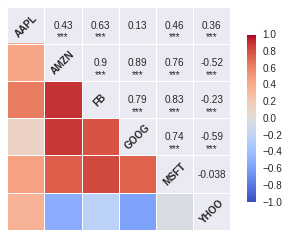

In [219]:
sns.corrplot(closing_stock_df.dropna(), annot=True)

In [231]:
x = daily_return.dropna()

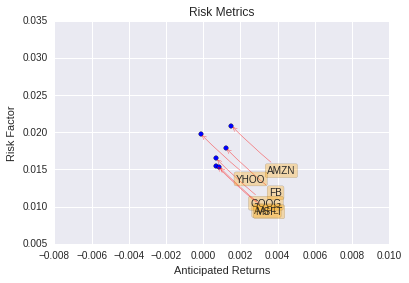

In [256]:
x = daily_return.dropna()
plt.scatter(x.mean(),x.std())

plt.xlabel("Anticipated Returns")
plt.ylabel("Risk Factor")
plt.title("Risk Metrics")

for label,x,y in zip(x.columns, x.mean(), x.std()):

    plt.annotate(label, 
                 xy=(x, y), 
                 xytext=(50,-50), 
            textcoords='offset points',
                 ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', 
                      fc='orange', 
                      alpha=0.3),
            arrowprops=dict(arrowstyle="->", 
                            connectionstyle='arc3,rad=-0.03', 
                            color='red'))

plt.show()